# Program 1: A* Algorithm


In [1]:
def aStarAlgo(start_node, stop_node):
    

    open_set = set(start_node) 
    closed_set = set()
    g = {} 
    parents = {}
    g[start_node] = 0
    parents[start_node] = start_node 

    while len(open_set) > 0 :
        n = None

        for v in open_set: 
            if n == None or g[v] + heuristic(v) < g[n] + heuristic(n):
                n = v 

        if n == stop_node or Graph_nodes[n] == None:
            pass
        else:
            for (m, weight) in get_neighbors(n):

                if m not in open_set and m not in closed_set:
                    open_set.add(m)     
                    parents[m] = n       
                    g[m] = g[n] + weight 

                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_set:
                            closed_set.remove(m)
                            open_set.add(m)

        if n == None:
            print('Path does not exist!')
            return None

        if n == stop_node:
            path = []

            while parents[n] != n:
                path.append(n)
                n = parents[n]

            path.append(start_node)

            path.reverse()

            print('Path found: {}'.format(path))
            return path


        open_set.remove(n)
        closed_set.add(n)

    print('Path does not exist!')
    return None

def get_neighbors(v):
    if v in Graph_nodes:
        return Graph_nodes[v]
    else:
        return None
 
def heuristic(n):
    H_dist = {
        'S': 5,
        'A': 3,
        'B': 4,
        'C': 2,
        'D': 6,
        'G': 0   
    }

    return H_dist[n]


Graph_nodes = {
    
    'S': [('A', 1), ('G', 10)],
    'A': [('B', 2), ('C', 1)],
    'B': [('D', 5)],
    'C': [('D', 3), ('G', 4)],
    'D': [('G', 2)],
}
aStarAlgo('S', 'G')

Path found: ['S', 'A', 'C', 'G']


['S', 'A', 'C', 'G']

# Program 2: AO* Algorithm

In [8]:
class Graph:
    def __init__(self, graph, heuristicNodeList, startNode): 

        self.graph = graph
        self.H = heuristicNodeList
        self.start = startNode
        self.parent = {}
        self.status = {}
        self.solutionGraph = {}

    def applyAOStar(self):  
        self.aoStar(self.start, False)

    def getNeighbors(self, v): 
        return self.graph.get(v, '')

    def getStatus(self, v): 
        return self.status.get(v, 0)

    def setStatus(self, v, val): 
        self.status[v] = val

    def getHeuristicNodeValue(self, n):
        return self.H.get(n, 0)  

    def setHeuristicNodeValue(self, n, value):
        self.H[n] = value  

    def printSolution(self):
        print("FOR GRAPH SOLUTION, TRAVERSE THE GRAPH FROM THE START NODE:", self.start)
        print("------------------------------------------------------------")
        print(self.solutionGraph)
        print("------------------------------------------------------------")

    def computeMinimumCostChildNodes(self, v):  
        minimumCost = 0
        costToChildNodeListDict = {}
        costToChildNodeListDict[minimumCost] = []
        flag = True
        for nodeInfoTupleList in self.getNeighbors(v): 
            cost = 0
            nodeList = []
            for c, weight in nodeInfoTupleList:
                cost = cost + self.getHeuristicNodeValue(c) + weight
                nodeList.append(c)

            if flag == True: 
                minimumCost = cost
                costToChildNodeListDict[minimumCost] = nodeList 
                flag = False
            else:  
                if minimumCost > cost:
                    minimumCost = cost
                    costToChildNodeListDict[minimumCost] = nodeList  

        return minimumCost, costToChildNodeListDict[minimumCost] 

    def aoStar(self, v, backTracking):  

        print("HEURISTIC VALUES  :", self.H)
        print("SOLUTION GRAPH    :", self.solutionGraph)
        print("PROCESSING NODE   :", v)
        print("-----------------------------------------------------------------------------------------")

        if self.getStatus(v) >= 0:  
            minimumCost, childNodeList = self.computeMinimumCostChildNodes(v)
            self.setHeuristicNodeValue(v, minimumCost)
            self.setStatus(v, len(childNodeList))

            solved = True  
            for childNode in childNodeList:
                self.parent[childNode] = v
                if self.getStatus(childNode) != -1:
                    solved = solved & False

            if solved == True: 
                self.setStatus(v, -1)
                self.solutionGraph[
                    v] = childNodeList 
               

            if v != self.start:  
                self.aoStar(self.parent[v],
                            True)  

            if not backTracking: 
                for childNode in childNodeList:  
                    self.setStatus(childNode, 0)  
                    self.aoStar(childNode,
                                False) 


h1 = {'A': 1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G':3 , 'H': 0, 'I': 0, 'J': 0}
graph1 = {
    'A': [[('B', 1)], [('C', 1), ('D', 1)]],
    'B': [[('E', 1)], [('F', 1)]],
    'C': [[('G', 1)], [('H', 1), ('I', 1)]],
    'D': [[('J', 1)]]
}
G1 = Graph(graph1, h1, 'A')
G1.applyAOStar()
G1.printSolution()


HEURISTIC VALUES  : {'A': 1, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 6, 'B': 5, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0}
SOLUTION GRAPH    : {}
PROCESSING NODE   : B
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 6, 'B': 8, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0}
SOLUTION GRAPH    : {}
PROCESSING NODE   : A
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 8, 'B': 8, 'C': 2, 'D': 4, 'E': 7, 'F': 9, 'G': 3, 'H': 0, 'I': 0, 'J': 0}
SOLUTION GRAPH    : {}
PROCESSING NODE   : E
-----------------------------------------------------------------------------------------
HEURISTIC VALUES  : {'A': 8, 'B': 8, 'C': 2, 'D': 4, 'E'

# Program 3 : Candidate Eleimination Algorithm

In [23]:
import csv

with open("trainingexamples-3.csv") as f:
    csv_file = csv.reader(f)
    data = list(csv_file)

    specific = data[1][:-1]
    general = [['?' for i in range(len(specific))] for j in range(len(specific))]

    for i in data:
        print(i)
        if i[-1] == "Yes":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    specific[j] = "?"
                    general[j][j] = "?"

        elif i[-1] == "No":
            for j in range(len(specific)):
                if i[j] != specific[j]:
                    general[j][j] = specific[j]
                else:
                    general[j][j] = "?"

        print("\nStep " + str(data.index(i)+1) + " of Candidate Elimination Algorithm")
        print(specific)
        print(general)

    gh = [] # gh = general Hypothesis
    for i in general:
        for j in i:
            if j != '?':
                gh.append(i)
                break
    print("\nFinal Specific hypothesis:\n", specific)
    print("\nFinal General hypothesis:\n", gh)


Step 1 of Candidate Elimination Algorithm
['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 2 of Candidate Elimination Algorithm
['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 3 of Candidate Elimination Algorithm
['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]

Step 4 of Candidate Elimination Algorithm
['sky', 'airtemp', 'humidity', 'wind', 'water', 'forcast']
[['?', '?', '

# Program 4 : Decision tree based ID3 algorithm.

In [6]:
import pandas as pd
from pprint import pprint
from sklearn.feature_selection import mutual_info_classif
from collections import Counter

def id3(df, target_attribute, attribute_names, default_class=None):
    cnt = Counter(x for x in df[target_attribute])
    if len(cnt) == 1:
        return next(iter(cnt))
    
    elif df.empty or (not attribute_names):
        return default_class

    else:
        gainz = mutual_info_classif(df[attribute_names], df[target_attribute], discrete_features=True)
        
        try:
            index_of_max = gainz.tolist().index(max(gainz))
        except ValueError:
            return default_class

        if 0 <= index_of_max < len(attribute_names):
            best_attr = attribute_names[index_of_max]
            tree = {best_attr: {}}
            remaining_attribute_names = [i for i in attribute_names if i != best_attr]

            for attr_val, data_subset in df.groupby(best_attr):
                subtree = id3(data_subset, target_attribute, remaining_attribute_names, default_class)
                tree[best_attr][attr_val] = subtree

            return tree
        else:
            return default_class

try:
    df = pd.read_csv("p-tennis.csv")
    attribute_names = df.columns.tolist()
    print("List of attribute names")

    if "PlayTennis" in attribute_names:
        attribute_names.remove("PlayTennis")
    else:
        print("Target attribute 'PlayTennis' not found in the list of attributes.")

    for colname in df.select_dtypes("object"):
        df[colname], _ = df[colname].factorize()

    print(df)

    tree = id3(df, "PlayTennis", attribute_names)
    print("The tree structure")
    pprint(tree)

except Exception as e:
    print(f"An error occurred: {e}")


List of attribute names
    Outlook  Temperature  Humidity   Wind  PlayTennis
0         0            0         0   True           0
1         0            0         0  False           0
2         1            0         0  False           1
3         2            1         0  False           1
4         2            2         1   True           1
5         2            2         1   True           0
6         1            2         1  False           1
7         0            1         0  False           0
8         0            2         1  False           1
9         2            1         1  False           1
10        0            1         1   True           1
11        1            1         0   True           1
12        1            0         1  False           1
13        2            1         0   True           0
The tree structure
{'Outlook': {0: {'Humidity': {0: 0, 1: 1}},
             1: 1,
             2: {'Wind': {False: 1,
                          True: {'Temperature': 

# Program 5 : Backpropagation algorithm

In [1]:
import numpy as np 

inputNeurons=2 
hiddenlayerNeurons=4 
outputNeurons=2 
iteration=6000

input = np.random.randint(1,5,inputNeurons) 
output = np.array([1.0,0.0]) 
hidden_layer=np.random.rand(1,hiddenlayerNeurons)

hidden_biass=np.random.rand(1,hiddenlayerNeurons) 
output_bias=np.random.rand(1,outputNeurons) 
hidden_weights=np.random.rand(inputNeurons,hiddenlayerNeurons) 
output_weights=np.random.rand(hiddenlayerNeurons,outputNeurons)

def sigmoid (layer):
    return 1/(1 + np.exp(-layer))


def gradient(layer): 
    return layer*(1-layer)

for i in range(iteration):

    hidden_layer=np.dot(input,hidden_weights) 
    hidden_layer=sigmoid(hidden_layer+hidden_biass)

    output_layer=np.dot(hidden_layer,output_weights) 
    output_layer=sigmoid(output_layer+output_bias)

    error = (output-output_layer) 
    gradient_outputLayer=gradient(output_layer)
    error_terms_output=gradient_outputLayer * error 
    error_terms_hidden=gradient(hidden_layer)*np.dot(error_terms_output,output_weights.T)

    gradient_hidden_weights = np.dot(input.reshape(inputNeurons,1),error_terms_hidden.reshape(1,hiddenlayerNeurons))
    gradient_ouput_weights = np.dot(hidden_layer.reshape(hiddenlayerNeurons,1),error_terms_output.reshape(1,outputNeurons))

    hidden_weights = hidden_weights + 0.05*gradient_hidden_weights 
    output_weights = output_weights + 0.05*gradient_ouput_weights 
    if i<50 or i>iteration-50:
        print("**********************") 
        print("iteration:",i,"::::",error) 
        print("###output########",output_layer)

**********************
iteration: 0 :::: [[ 0.07682004 -0.90116105]]
###output######## [[0.92317996 0.90116105]]
**********************
iteration: 1 :::: [[ 0.07677932 -0.89995239]]
###output######## [[0.92322068 0.89995239]]
**********************
iteration: 2 :::: [[ 0.07673883 -0.89871953]]
###output######## [[0.92326117 0.89871953]]
**********************
iteration: 3 :::: [[ 0.07669854 -0.89746187]]
###output######## [[0.92330146 0.89746187]]
**********************
iteration: 4 :::: [[ 0.07665846 -0.89617878]]
###output######## [[0.92334154 0.89617878]]
**********************
iteration: 5 :::: [[ 0.07661859 -0.89486964]]
###output######## [[0.92338141 0.89486964]]
**********************
iteration: 6 :::: [[ 0.07657892 -0.89353378]]
###output######## [[0.92342108 0.89353378]]
**********************
iteration: 7 :::: [[ 0.07653946 -0.89217053]]
###output######## [[0.92346054 0.89217053]]
**********************
iteration: 8 :::: [[ 0.07650018 -0.8907792 ]]
###output######## [[0.92349

# Program 6 : naïve Bayesian classifier

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


file_path = 'p-tennis.csv'  
df = pd.read_csv(file_path)

df['Outlook'] = df['Outlook'].astype('category').cat.codes
df['Temperature'] = df['Temperature'].astype('category').cat.codes
df['Humidity'] = df['Humidity'].astype('category').cat.codes
df['Wind'] = df['Wind'].astype('category').cat.codes
df['PlayTennis'] = df['PlayTennis'].astype('category').cat.codes

X = df.drop('PlayTennis', axis=1)
y = df['PlayTennis']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb_classifier = GaussianNB()

nb_classifier.fit(X_train, y_train)


y_pred = nb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 66.67%


# Program 7 : EM algorithm to cluster a set of data

Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


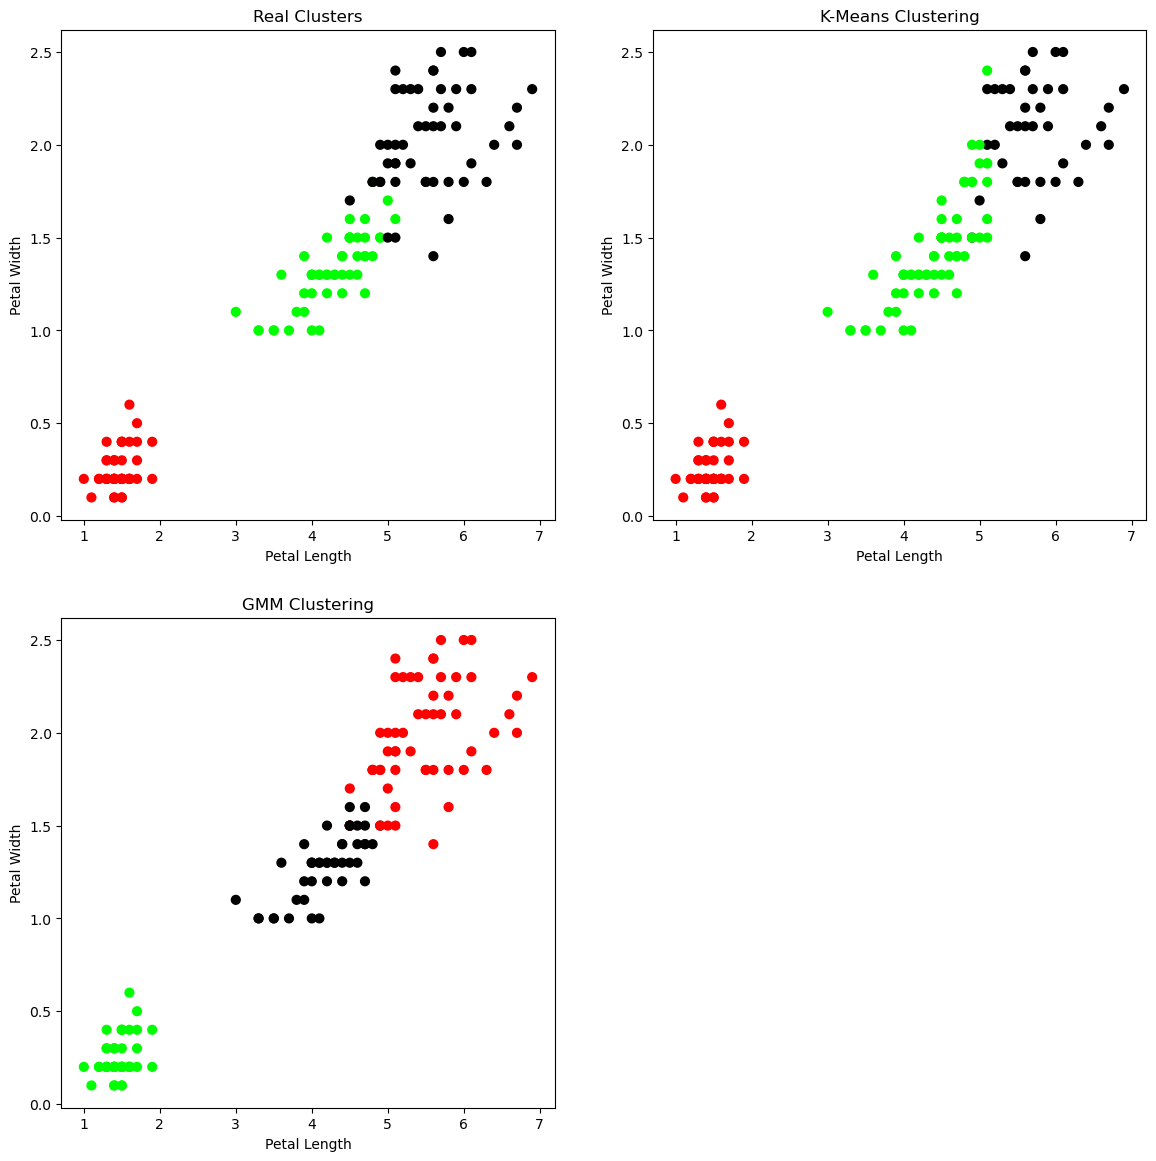

In [18]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

iris = datasets.load_iris() 

X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

model = KMeans(n_clusters=3)
model.fit(X) 
plt.figure(figsize=(14,14))
colormap = np.array(['red', 'lime', 'black'])
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')

# Program 8 - k-Nearest Neighbour algorithm

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import datasets
iris=datasets.load_iris() 
print("Iris Data set loaded...")
x_train, x_test, y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.1)
#random_state=0
for i in range(len(iris.target_names)):
    print("Label", i , "-",str(iris.target_names[i]))
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)
print("Results of Classification using K-nn with K=5") 
for r in range(0,len(x_test)):
    print(" Sample:", str(x_test[r]), " Actual-label:", str(y_test[r])," Predicted-label:", str(y_pred[r]))

    print("Classification Accuracy :" , classifier.score(x_test,y_test));

Iris Data set loaded...
Label 0 - setosa
Label 1 - versicolor
Label 2 - virginica
Results of Classification using K-nn with K=5
 Sample: [5.7 2.6 3.5 1. ]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [6.9 3.1 4.9 1.5]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [4.8 3.  1.4 0.3]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [5.5 2.4 3.7 1. ]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [4.9 3.1 1.5 0.1]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [5.  3.4 1.6 0.4]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [4.4 3.  1.3 0.2]  Actual-label: 0  Predicted-label: 0
Classification Accuracy : 1.0
 Sample: [5.6 2.8 4.9 2. ]  Actual-label: 2  Predicted-label: 2
Classification Accuracy : 1.0
 Sample: [6.1 2.8 4.7 1.2]  Actual-label: 1  Predicted-label: 1
Classification Accuracy : 1.0
 Sample: [4.8 3.  1.4 0.1]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

# Program 9  : Locally Weighted Regressionalgorithm

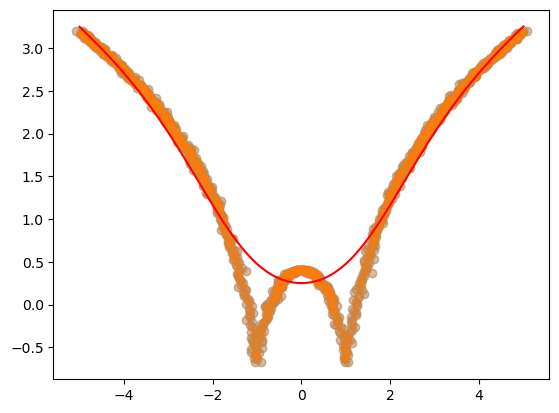

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 1000)
y = np.log(np.abs((x ** 2) - 1) + 0.5)
x = x + np.random.normal(scale=0.05, size=1000) 
plt.scatter(x, y, alpha=0.3)
def local_regression(x0, x, y, tau): 
    x0 = np.r_[1, x0]
    x = np.c_[np.ones(len(x)), x]
    xw =x.T * radial_kernel(x0, x, tau) 
    beta = np.linalg.pinv(xw @ x) @ xw @ y 
    return x0 @ beta


def radial_kernel(x0, x, tau):
    return np.exp(np.sum((x - x0) ** 2, axis=1) / (-2 * tau ** 2))


def plot_lr(tau):
    domain = np.linspace(-5, 5, num=500)
    pred = [local_regression(x0, x, y, tau) for x0 in domain] 
    plt.scatter(x, y, alpha=0.3)
    plt.plot(domain, pred, color="red") 
    return plt


plot_lr(1).show()